In [0]:
# setup
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

from sklearn import datasets


from google.colab import files

###Zadanie 0. Utwórz skrypt definiujący poniższe zmienne:

a = [1, 2, 3, 4, ..., 100] (wektor złożony z liczb całkowitych od 1 do 100)

In [0]:
a = np.arange(1, 101)


b = [1, 3, 5, 7, ..., 99] (wektor złożony z liczb całkowitych nieparzystych od 1 do 99)

In [0]:
b = np.arange(1, 100, 2)

c = [-1.00 * π, -0.99 * π, ..., -0.01 * π, 0, 0.01 * π, ..., 0.99 * π, 1.00 * π]

In [0]:
c = np.linspace(-math.pi, math.pi, 201).round(6)

d = [-1.00 * π, -0.99 * π, ..., -0.01 * π, 0.01 * π, ..., 0.99 * π, 1.00 * π] 

In [0]:
d = c[c.nonzero()]

e = [e1, e2, ..., e100], gdzie ei = sin(i), jeśli sin(i) > 0, lub ei = 0 w przeciwnym przypadku

In [0]:
e = [max(0.0, math.sin(i)) for i in range(1, 101)]

A = macierz rozmiaru 10 x 10 zawierająca liczby całkowite od 1 do 100: w pierwszym wierszu od
lewej 1, 2, ..., w drugim wierszu od lewej 11, 12, .., itd. (wskazówka: użyć polecenia reshape) 

In [0]:
A = np.arange(1, 101).reshape(10, 10)

B = macierz trójdiagonalna rozmiaru 100 x 100 mająca na głównej przekątnej liczby całkowite od 1
do 100, a poniżej i powyżej głównej przekątnej liczby od 99 do 1

In [0]:
B = np.diag(np.arange(1, 101)) + np.diag(np.arange(99, 0, -1), 1) + np.diag(np.arange(99, 0, -1), -1)

C = macierz trójkątna górna wypełniona jedynkami (łącznie z główną przekątną)

In [0]:
C = np.triu(np.ones((10, 10)))

D = macierz rozmiaru 2 x 100, w której pierwszy wiersz zawiera elementy d1i = 1 + 2 + ... + i, a
drugi wiersz zawiera elementy d2i = i!

In [0]:
D = np.append(np.cumsum(np.arange(1, 101)), np.cumprod(np.arange(1, 101), dtype=float)).reshape((2, 100))

E = macierz rozmiaru 100 x 100 mająca 1 w pozycji (i, j), jeśli i dzieli j, lub 0 w przeciwnym
przypadku.

In [0]:
E = np.array([[0 if x%y else 1 for x in range(1, 101)] for y in range(1, 101)])

###Zadanie 1.

a) Wygeneruj 10 000 liczb z rozkładu jednostajnego na odcinku [-1, 1]. Sporządź ich histogram z 100 przedziałami. Porównaj histogram z wykresem funkcji gęstości. Powtórz obliczenia dla 100 000 liczb.

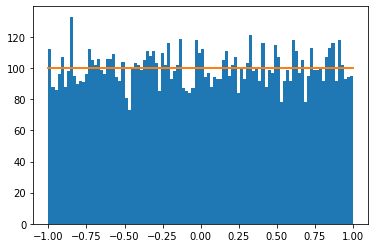

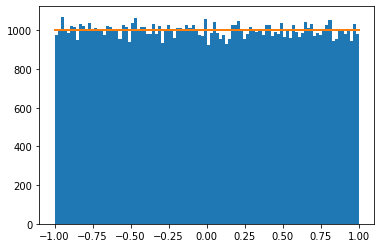

In [102]:
rand_1 = np.random.uniform(-1, 1, 10000)
plt.figure()
count, bins, ignored = plt.hist(rand_1, 100)
plt.plot(bins, np.full_like(bins, np.average(count)), linewidth=2)

rand_2 = np.random.uniform(-1, 1, 100000)
plt.figure()
count, bins, ignored = plt.hist(rand_2, 100)
plt.plot(bins, np.full_like(bins, np.average(count)), linewidth=2)


b) Wygeneruj 10 000 liczb z rozkładu normalnego o średniej 5 i odchyleniu standardowym 3. Sporządź ich histogram z 100 przedziałami. Porównaj histogram z wykresem funkcji gęstości. Powtórz obliczenia dla 100 000 liczb.

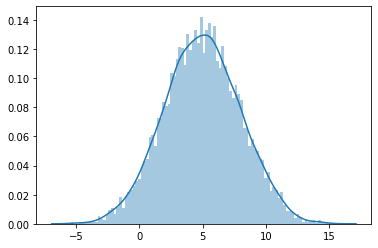

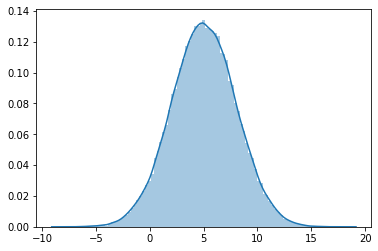

In [103]:
rand_1 = np.random.normal(5, 3, 10000)
plt.figure()
sns.distplot(rand_1, bins=np.linspace(min(rand_1), max(rand_1), 100))


rand_2 = np.random.normal(5, 3, 100000)
plt.figure()
sns.distplot(rand_2, bins=np.linspace(min(rand_2), max(rand_2), 100))

c) Wygeneruj 10 000 punktów (x, y), których współrzędna x ma rozkład normalny N(2, 5), zaś współrzędna y ma rozkład normalny N(3, 1). Sporządź wykres tych punktów. Porównaj go z wykresem funkcji gęstości. Powtórz obliczenia dla 100 000 punktów.

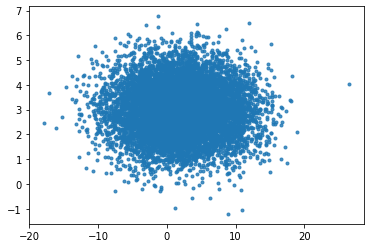

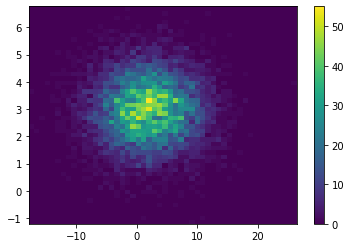

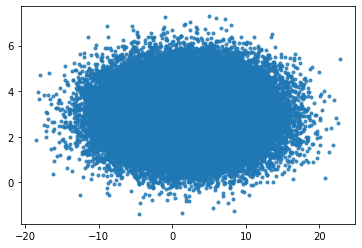

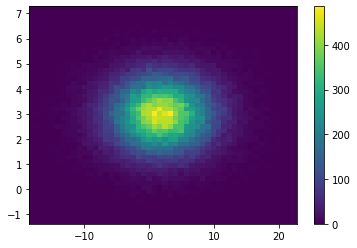

In [104]:
rand_1_x = np.random.normal(2, 5, 10000)
rand_1_y = np.random.normal(3, 1, 10000)
sns.regplot(x=rand_1_x, y=rand_1_y, fit_reg=False, marker='.')

plt.figure()

h=plt.hist2d(rand_1_x,rand_1_y, bins=[50, 50])
plt.colorbar(h[3])


plt.figure()

rand_2_x = np.random.normal(2, 5, 100000)
rand_2_y = np.random.normal(3, 1, 100000)
sns.regplot(x=rand_2_x, y=rand_2_y, fit_reg=False, marker='.')

plt.figure()

h=plt.hist2d(rand_2_x,rand_2_y, bins=[50, 50])
plt.colorbar(h[3])

d) Używając danych wygenerowanych w poprzednim punkcie oszacuj prawdopodobieństwo, że X < Y dla zmiennych losowych X z rozkładem normalnym N(2, 5) i Y z rozkładem normalnym N(3, 1). Uzyskaną wartość porównaj z dokładnym prawdopodobieństwem takiego zdarzenia obliczonym w oparciu o rachunek prawdopodobieństwa i statystykę.

In [122]:
zipped = np.array(list(zip(rand_2_x, rand_2_y)))

prob = np.count_nonzero(np.apply_along_axis(lambda x : x[0] < x[1], axis=1, arr=zipped)) / len(zipped)
prob

0.57934

###Zadanie 2.
a) Niech x, y, w będą wektorami kolumnowymi ustalonej długości d. Policz:
- długość wektora x,
- średnią ważoną wektora x z wagami w,
- odległość euklidesową między wektorami x i y,
- iloczyn skalarny wektorów x i y.
Obliczenia przeprowadź dla losowo wygenerowanych wektorów x, y, w (dla d = 100).

In [0]:
d = 100
x = np.random.rand(d)
y = np.random.rand(d)
w = np.random.rand(d)

x_len = np.sqrt(np.dot(x, x))
xw_len = np.sqrt(np.dot(x*w, x*w))
xy_euk = np.sqrt(np.sum(np.subtract(x, y)**2))
xy_dot = np.dot(x, y)

b) Niech X będzie macierzą ustalonego rozmiaru d x N zawierającą N wektorów kolumnowych długości d. Niech y i w będą wektorami kolumnowymi długości d. Policz
- długości kolejnych wektorów z macierzy X (wyznacz wektor długości N zawierający te długości),
  
- średnią ważoną kolejnych wektorów z macierzy X z wagami w (wyznacz wektor długości N zawierający te średnie),
- odległości euklidesowe między kolejnymi wektorami z macierzy X i wektorem y (wyznacz wektor długości N zawierający te odległości),
- iloczyny skalarne kolejnych wektorów z macierzy X i wektora y (wyznacz wektor długości N zawierający te iloczyny).
Obliczenia przeprowadź dla losowo wygenerowanej macierzy X i losowo wygenerowanych wektorów y i w (dla d = 100 i N = 1000).

In [0]:
d = 100
N = 1000
X = np.random.rand(N, d)

X_row_len = np.apply_along_axis(lambda x : np.sqrt(np.dot(x, x)), 1, X)

Xw_row_mean = np.apply_along_axis(lambda x : np.mean(np.dot(x, w)), 1, X)

Xy_euk = np.apply_along_axis(lambda x : np.sqrt(np.sum(np.subtract(x, y)**2)), 1, X)

Xy_dot = np.apply_along_axis(lambda x : np.dot(x, y), 1, X)

###Zadanie 3.
a) Wczytaj dane IRIS.

In [126]:
iris = datasets.load_iris()
s_length = iris.data[:,0]
s_width = iris.data[:,1]
iris.data, iris.target, iris.feature_names, iris.target_names

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

b) Przedstaw wczytane dane na wykresie w poniższy sposób

Text(0, 0.5, 'sepal width (cm)')

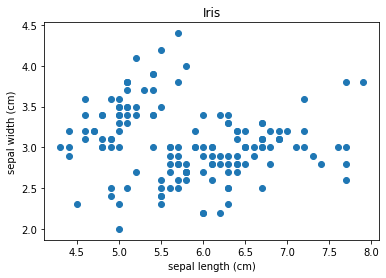

In [127]:
plt.scatter(s_length, s_width)
plt.title('Iris')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

c) Zmień zakres osi: oś X powinna pokazywać wartości od 3 do 9, a oś Y od 1 do 5.

(1, 5)

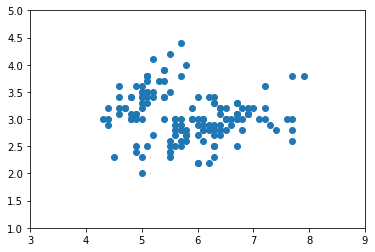

In [128]:
plt.scatter(x=s_length, y=s_width)
plt.xlim(3, 9)
plt.ylim(1, 5)

d) Zmień podziałki na osiach, tak aby zaznaczone były tylko liczby całkowite.

([<matplotlib.axis.YTick at 0x7fddf0a4b898>,
 <a list of 3 Text yticklabel objects>)

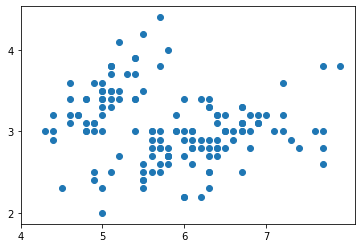

In [136]:
plt.scatter(x=s_length, y=s_width)
plt.xticks(np.arange(math.floor(min(s_length)), math.ceil(max(s_length))))
plt.yticks(np.arange(math.floor(min(s_width)), math.ceil(max(s_width))))

e) Każdy gatunek irysa zaznacz innym kolorem.

f) Zapisz rysunek do pliku zadanie1.png.

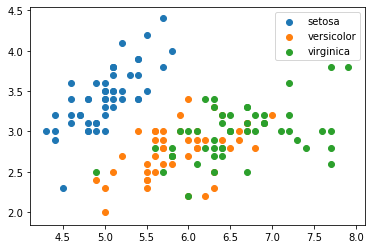

In [0]:
indxs = [np.where(iris.target == x) for x in np.unique(iris.target)]

for i in indxs:
    plt.scatter(x=s_length[i], y=s_width[i], label=iris.target_names[iris.target[i][0]])
plt.legend()
plt.savefig('zadanie1.png')
files.download('zadanie1.png')

###Zadanie 4.
a) Zrób rysunek podobny do tego z poprzedniego zadania, ale umieść na nim tylko irysy gatunku setosa i versicolor (nie rysuj irysów gatunku versicolor).

b) Dodaj do rysunku prostą o równaniu y = 2 x – 8

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),), (array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),)]


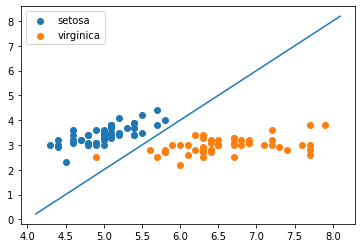

In [138]:
indxs = [np.where(iris.target == x) for x in np.unique(iris.target) if iris.target_names[x] != 'versicolor']
print(indxs)

for I in indxs:
    plt.scatter(x=s_length[I], y=s_width[I], label=iris.target_names[iris.target[I][0]])

plt.legend()
xs = np.linspace(*plt.xlim(), 100)
plt.plot(xs, 2*xs-8)

c) Irysy gatunku setosa znajdujące się pod narysowaną linią zaznacz na czerwono, pozostałe na zielono. Irysy gatunku virginica znajdujące się nad narysowaną linią zaznacz na czerwono, pozostałe na zielono.


d) Zapisz rysunek do pliku zadanie2a.png.

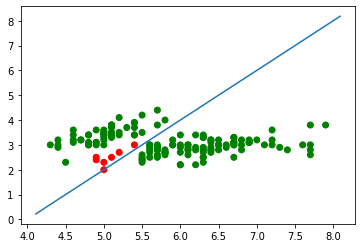

In [0]:
col = np.where(iris.target_names[iris.target] == 'setosa', 
              np.where(2*s_length - 8 > s_width, 'r', 'g'),
              np.where(2*s_length - 8 > s_width, 'g', 'r'))

plt.scatter(s_length, s_width, c=col)
xs = np.linspace(*plt.xlim(), 100)
plt.plot(xs, 2*xs-8)

plt.savefig('zadanie2a.png')
files.download('zadanie2a.png')

e) Spróbuj zmienić równanie prostej z punktu b) tak, aby zmniejszyć liczbę czerwonych punktów.

f) Zapisz rysunek do pliku zadanie2b.png.

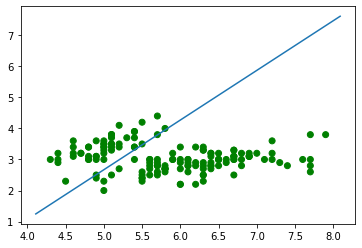

In [0]:
a, b = 1.6, -5.33
col = np.where(iris.target_names[iris.target] == 'setosa', 
              np.where(a*s_length + b > s_width, 'r', 'g'),
              np.where(a*s_length + b > s_width, 'g', 'r'))

plt.scatter(s_length, s_width, c=col)
xs = np.linspace(*plt.xlim(), 100)
plt.plot(xs, a*xs + b)

plt.savefig('zadanie2b.png')
files.download('zadanie2b.png')

###Zadanie 5.
a) Zrób rysunek przedstawiający 10 punktów o następujących współrzędnych (1, 10), (2, 10), (3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26).

b) Dodaj do rysunku prostą o równaniu y = 2 x + 5.

c) Zapisz rysunek do pliku zadanie3a.png.

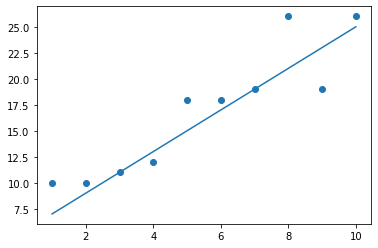

In [0]:
p = np.array([(1, 10), (2, 10), (3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26)])
plt.scatter(*p.T)
xs = np.linspace(np.min(p.T[0]), np.max(p.T[0]), 100)
plt.plot(xs, 2*xs + 5)

plt.savefig('zadanie3a.png')
files.download('zadanie3a.png')

d) Dla każdego punktu danych policz jego odległość od wyznaczonej prostej.
 
e) Spróbuj zmienić równanie prostej z punktu b) tak, aby zmniejszyć sumę odległości punktów danych od prostej.

f) Zapisz rysunek do pliku zadanie3b.png.

8.589556903873337


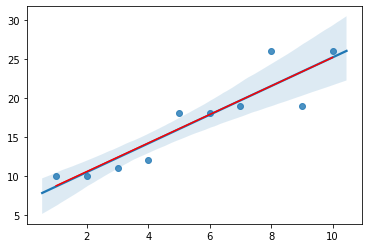

In [0]:
A, B, C = 1.825, 1, 6.9
d = np.abs((p.T[0]*A - p.T[1]*B + C) / math.sqrt(A**2 + B**2))

print(np.sum(d))

xs = np.linspace(np.min(p.T[0]), np.max(p.T[0]), 100)

sns.regplot(x=p.T[0], y=p.T[1])
plt.plot(xs, (A*xs + C)/B, c='r')

plt.savefig('zadanie3b.png')
files.download('zadanie3b.png')


###Zadanie 6.
Napisz program generujący zestaw dwuwymiarowych danych losowych złożony z K chmur punktów, taki że:

a) każda chmura punktów składała się z 1000 punktów o współrzędnych (x, y), gdzie x pochodzi z rozkładu normalnego N(ai, 1), y pochodzi z rozkładu normalnego N(bi, 1), zaś (ai, bi) to centrum i- tej chmury punktów,

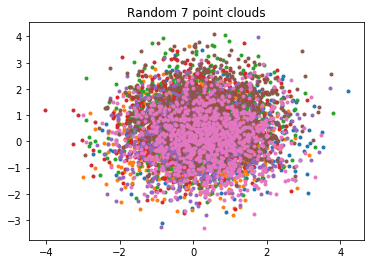

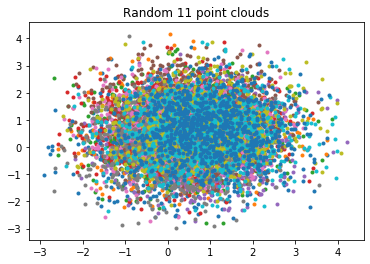

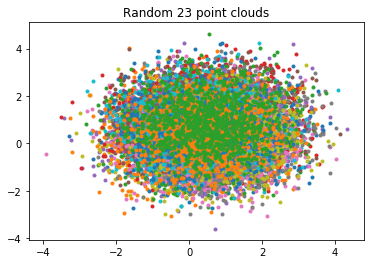

In [0]:
K = [7, 11, 23]
for k in K:
    plt.figure()
    plt.title(f'Random {k} point clouds')
    for _ in range(k):
        a = np.random.rand()
        b = np.random.rand()
        xs = np.random.normal(a, 1, 1000)
        ys = np.random.normal(b, 1, 1000)
        plt.scatter(xs, ys, marker='.')

b) centra chmur punktów (ai, bi) tworzą wielokąt foremny o boku o zadanej długości d.
Uruchom program dla K = 7, K = 11 i K = 23 oraz d = 5, d = 10 i d = 15. Zrób rysunki przedstawiające wyniki.

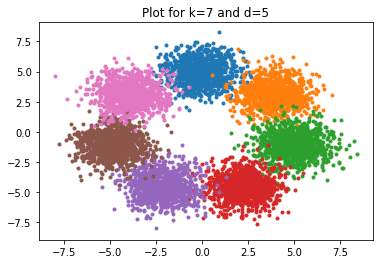

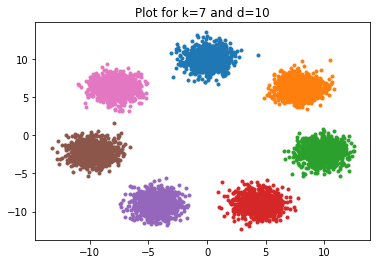

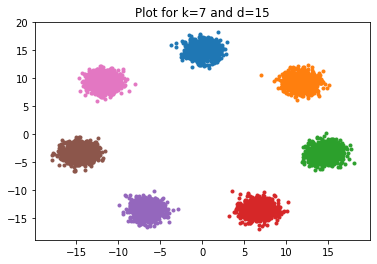

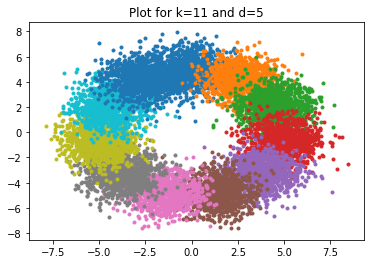

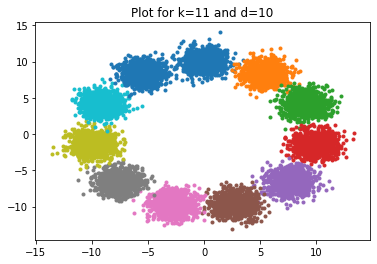

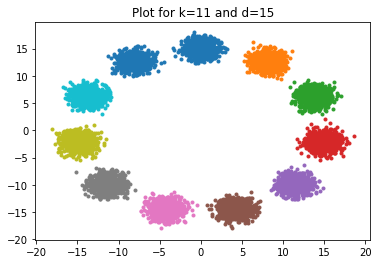

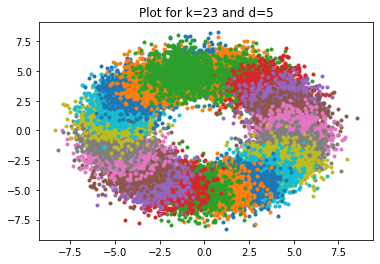

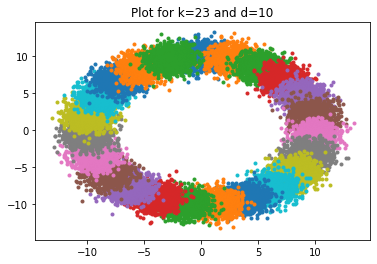

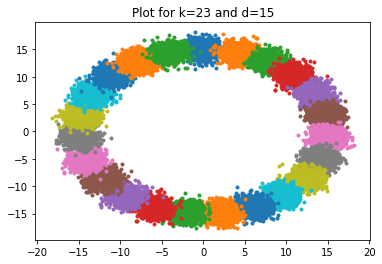

In [0]:
K = [7, 11, 23]
D = [5, 10, 15]

xs = {}
ys = {}
x_center = {}
y_center = {}

for k in K:
    angle = 2*math.pi / k
    
    for d in D:
        plt.figure()
        plt.title(f'Plot for k={k} and d={d}')
        
        r = d
        x_center[(k, d)] = r * np.sin(np.arange(k) * angle)
        y_center[(k, d)] = r * np.cos(np.arange(k) * angle)

        for i in range(k):
            xs[(k, d, i)] = np.random.normal(x_center[(k, d)][i], 1, 1000)
            ys[(k, d, i)] = np.random.normal(y_center[(k, d)][i], 1, 1000)
            plt.scatter(xs[(k, d, i)], ys[(k, d, i)], marker='.')


###Zadanie 7.
Dla danych z poprzedniego zadania policz odległość każdego punktu danych od każdego centrum chmury i na sporządzonych wykresach zaznacz kolorem czerwonym te punkty danych, które znajdują się bliżej centrum innej chmury niż chmury, z której pochodzą, a kolorem zielonym pozostałe punkty danych. Jak zależy frakcja punktów czerwonych od długości d? Jaka powinna być wartość d, żeby punkty czerwone stanowiły około 10% wszystkich punktów danych?

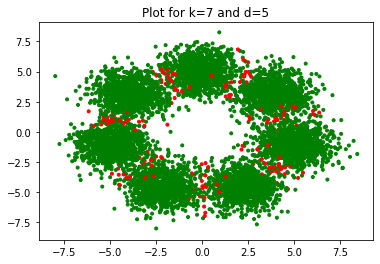

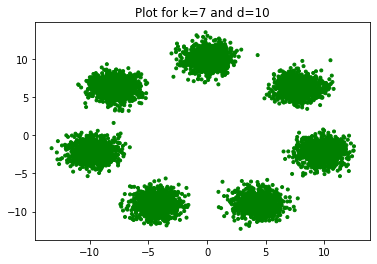

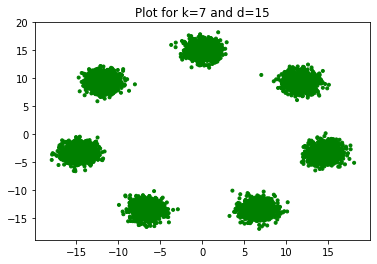

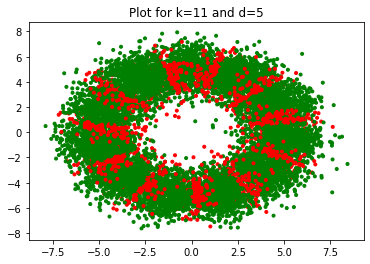

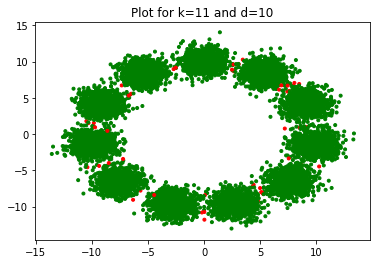

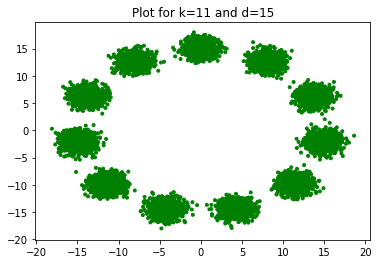

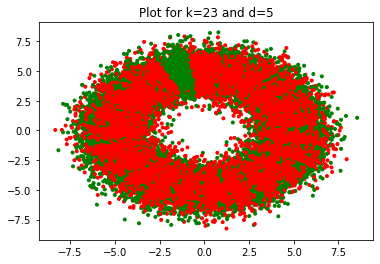

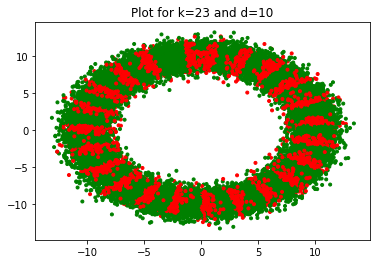

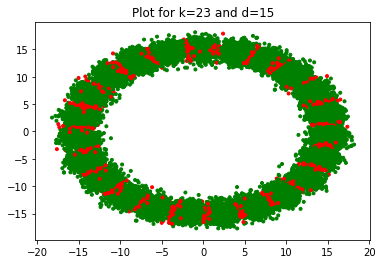

In [0]:
dists = {}  # dist[(k, d, i)] - distance array for k groups and d distance between centers, from each point from group 'i' to center of group 'j'
for k in K:
    for d in D:
        for i in range(k):
            dists[(k, d, i)] = [np.sqrt(np.subtract(xs[(k, d, i)], x_center[(k, d)][j])**2 + np.subtract(ys[k, d, i], y_center[(k, d)][j])**2)
                                   for j in range(k)]

not_good = {}

for k in K:
    for d in D:
        plt.figure()
        plt.title(f'Plot for k={k} and d={d}')
        for i in range(k):
            # for each point we find the index of the closest center
            tmp = np.apply_along_axis(np.argmin, axis=1, arr=list(zip(*dists[(k, d, i)])))
            col = np.where(tmp == i, 'g', 'r')
            not_good[(k, d, i)] = np.count_nonzero(col == 'r')
            
            plt.scatter(xs[(k, d, i)], ys[(k, d, i)], c=col, marker='.')
            


In [0]:
from collections import defaultdict

not_good_for_d = defaultdict(lambda: [])
for k, v in not_good.items():
    not_good_for_d[k[1]].append(v / 1000)

for k, v in not_good_for_d.items():
    not_good_for_d[k] = np.mean(not_good_for_d[k])

print(not_good_for_d)


defaultdict(<function <lambda> at 0x7fddf0b0f840>, {5: 0.32702439024390245, 10: 0.10031707317073171, 15: 0.022658536585365856})
